In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

%matplotlib inline

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [4]:
from VQR import VectorQuantileRegression

In [5]:
X = pd.read_excel('Data/MVEngel.xls', 'X' ,header= None)
Y = pd.read_excel('Data/MVEngel.xls', 'Y' ,header= None).fillna(0)

X.columns = ['income']

Y.columns = ['food',
'clothing',
'housing',
'heating/lightening',
'tools',
'education',
'public safety',
'health',
'services'
]

Y_col = Y.columns

In [6]:
X.head()

,income
0,835.94
1,873.44
2,951.44
3,473.00
4,601.00


In [7]:
Y.head()

,food,clothing,housing,heating/lightening,tools,education,public safety,health,services
0,576.28,129.34,78.32,46.80,0.0,0.0,0.0,5.2,0.0
1,631.80,83.00,79.80,73.84,0.0,5.0,0.0,0.0,0.0
2,608.64,134.00,108.00,78.00,0.0,5.0,0.0,17.8,0.0
3,301.00,40.00,76.00,46.00,0.0,0.0,2.0,8.0,0.0
4,378.00,65.00,84.00,50.00,0.0,0.0,6.0,18.0,0.0


In [8]:
Y_col

Index(['food', 'clothing', 'housing', 'heating/lightening', 'tools',
       'education', 'public safety', 'health', 'services'],
      dtype='object')

## Surface

C:\Users\delan\AppData\Local\Continuum\anaconda3\lib\site-packages\cvxpy\problems\problem.py:850: RuntimeWarning: overflow encountered in long_scalars
  self.num_scalar_data += const.size


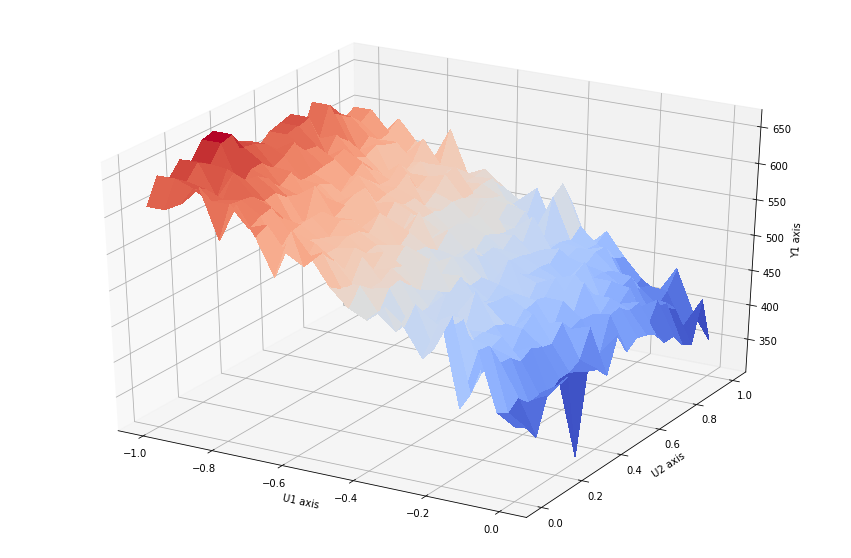

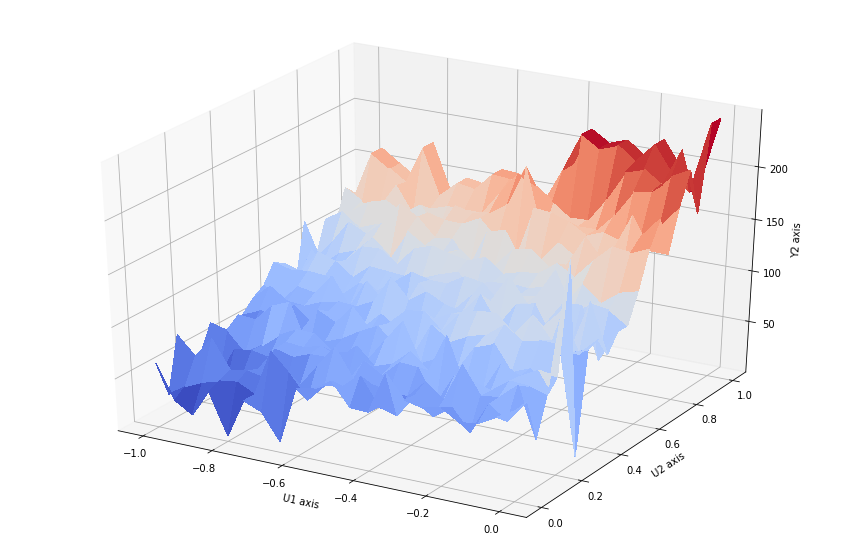

In [9]:
vqr = VectorQuantileRegression()
vqr.fit(X,Y[Y_col[:2]], step=0.05)
vqr.plot_surface(pd.DataFrame([800]))

## Plot

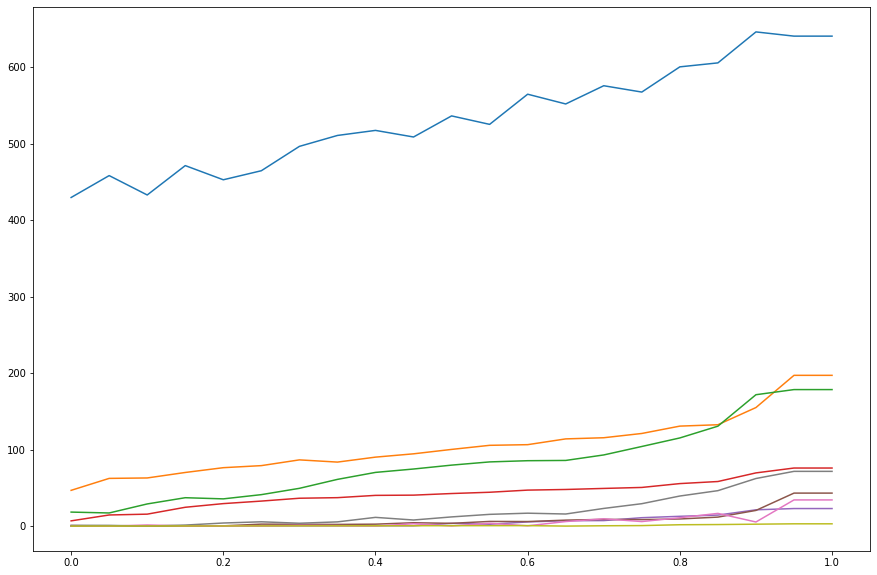

In [10]:
for col in Y_col:
    vqr = VectorQuantileRegression()
    vqr.fit(X,Y[[col]], step=0.05)
    vqr.plot_surface(pd.DataFrame([800]))

### multiplot

C:\Users\delan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\delan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


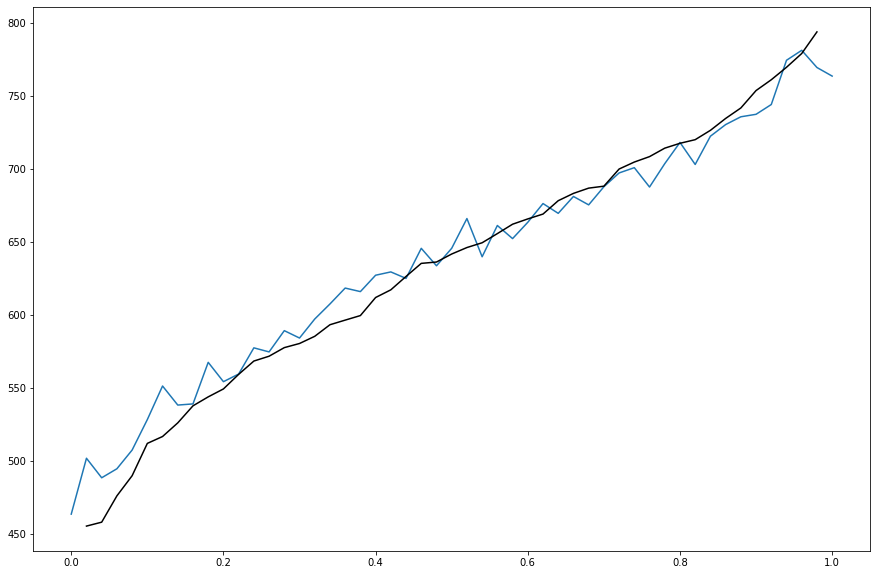

In [11]:
data = Y.copy()
data['income'] = X
step = 0.02

for col in [Y_col[0]]:
    x_test = 1000
    vqr = VectorQuantileRegression()
    vqr.fit(X,Y[[col]], step=step)
    df = vqr.predict(pd.DataFrame([x_test]))
    plt.plot(df[0].ravel(), df['y_pred'].apply(lambda x: np.abs(x)[0][0]).ewm(span=3).mean())
    
    mod = smf.quantreg(col+' ~ income', data)
    quantiles = np.arange(0+step, 1, step)
    def fit_model(q):
        res = mod.fit(q=q)
        return [q, res.params['Intercept'], res.params['income']] + \
                res.conf_int().loc['income'].tolist()

    models = [fit_model(x) for x in quantiles]
    models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

    n = models.shape[0]
    p1 = plt.plot(models.q, models.a + models.b*x_test, color='black', label='Quantile Reg.')

https://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html